<a href="https://colab.research.google.com/github/Faseeh56/Fuel-Consumption-Cost-Analysis/blob/main/Fuel_Consumption_%26_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Load Dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/CSV's/fuel_consumption.csv")
df.head()


,Vehicle_ID,Vehicle_Type,City,Distance_km,Fuel_Consumed_Liters,Fuel_Cost_PKR,Date
0,V034,Bus,Islamabad,141,26.86,7735,2023-04-21
1,V022,Bus,Karachi,66,11.57,3204,2023-04-14
2,V028,Van,Peshawar,68,16.57,4639,2023-01-08
3,V034,Van,Peshawar,167,39.92,11417,2023-04-27
4,V011,Bus,Peshawar,96,15.71,4398,2023-09-03


**Dataset Overview**

In [3]:
df.shape

(240, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_ID            240 non-null    object 
 1   Vehicle_Type          240 non-null    object 
 2   City                  240 non-null    object 
 3   Distance_km           240 non-null    int64  
 4   Fuel_Consumed_Liters  240 non-null    float64
 5   Fuel_Cost_PKR         240 non-null    int64  
 6   Date                  240 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 13.3+ KB


In [5]:
df.describe()

,Distance_km,Fuel_Consumed_Liters,Fuel_Cost_PKR
count,240.000000,240.000000,240.00000
mean,123.533333,25.274542,6960.33750
std,42.127806,9.972347,2770.42261
min,50.000000,8.320000,2229.00000
25%,88.000000,17.985000,4861.50000
50%,124.500000,24.840000,6834.00000
75%,158.250000,30.442500,8574.75000
max,199.000000,54.960000,14839.00000


**Feature Engineering**

In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate fuel efficiency (km per liter)
df['Fuel_Efficiency_km_per_liter'] = df['Distance_km'] / df['Fuel_Consumed_Liters']

df.head()


,Vehicle_ID,Vehicle_Type,City,Distance_km,Fuel_Consumed_Liters,Fuel_Cost_PKR,Date,Fuel_Efficiency_km_per_liter
0,V034,Bus,Islamabad,141,26.86,7735,2023-04-21,5.249442
1,V022,Bus,Karachi,66,11.57,3204,2023-04-14,5.704408
2,V028,Van,Peshawar,68,16.57,4639,2023-01-08,4.103802
3,V034,Van,Peshawar,167,39.92,11417,2023-04-27,4.183367
4,V011,Bus,Peshawar,96,15.71,4398,2023-09-03,6.110757


**Fuel Consumption by Vehicle Type**

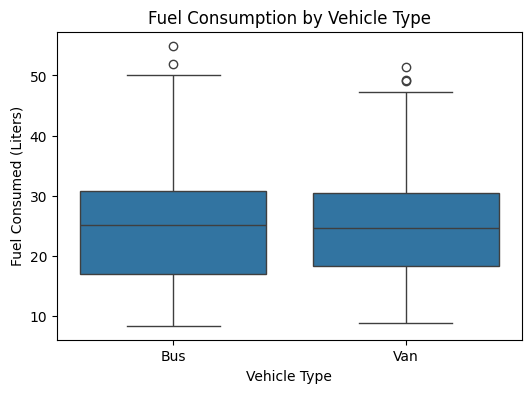

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Vehicle_Type', y='Fuel_Consumed_Liters')
plt.title("Fuel Consumption by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Fuel Consumed (Liters)")
plt.show()


**Fuel Cost by City**

In [8]:
city_fuel_cost = df.groupby('City')['Fuel_Cost_PKR'].sum().sort_values(ascending=False)
city_fuel_cost

,Fuel_Cost_PKR
City,
Karachi,252015
Lahore,247341
Multan,230614
Faisalabad,217825
Islamabad,207191
Rawalpindi,198747
Peshawar,167366
Quetta,149382


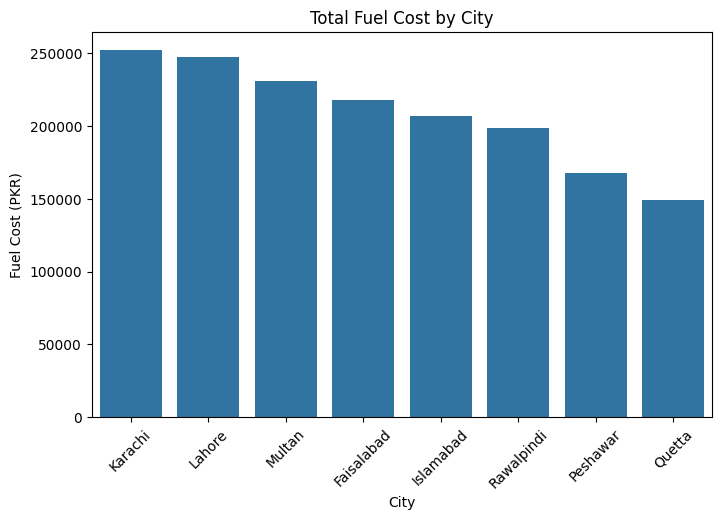

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x=city_fuel_cost.index, y=city_fuel_cost.values)
plt.title("Total Fuel Cost by City")
plt.xlabel("City")
plt.ylabel("Fuel Cost (PKR)")
plt.xticks(rotation=45)
plt.show()


**Fuel Efficiency Distribution**

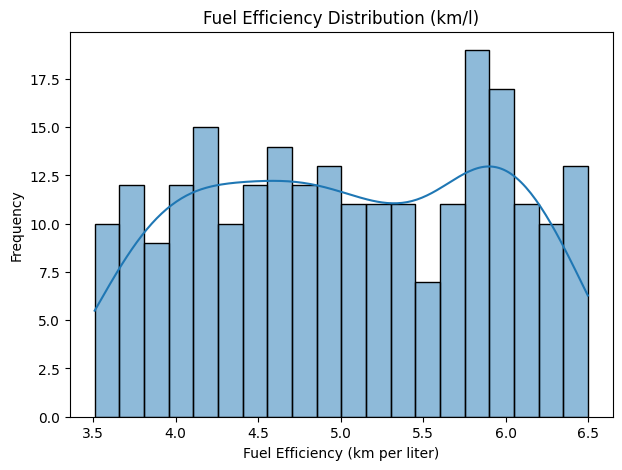

In [10]:
plt.figure(figsize=(7,5))
sns.histplot(df['Fuel_Efficiency_km_per_liter'], bins=20, kde=True)
plt.title("Fuel Efficiency Distribution (km/l)")
plt.xlabel("Fuel Efficiency (km per liter)")
plt.ylabel("Frequency")
plt.show()


**Distance vs Fuel Consumed**

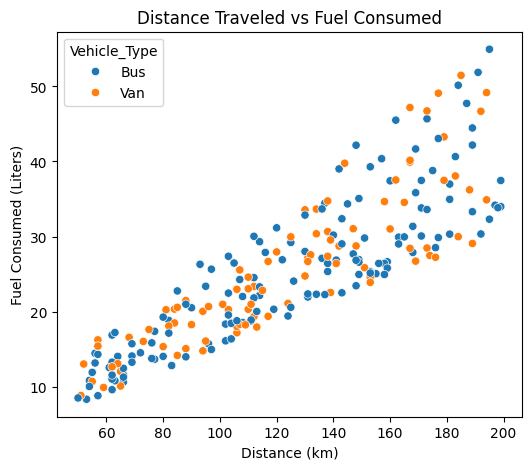

In [11]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='Distance_km', y='Fuel_Consumed_Liters', hue='Vehicle_Type')
plt.title("Distance Traveled vs Fuel Consumed")
plt.xlabel("Distance (km)")
plt.ylabel("Fuel Consumed (Liters)")
plt.show()


**High Cost Vehicles Identification**

In [12]:
vehicle_cost = df.groupby('Vehicle_ID')['Fuel_Cost_PKR'].mean().sort_values(ascending=False)
vehicle_cost

,Fuel_Cost_PKR
Vehicle_ID,
V033,10121.500000
V027,9937.333333
V008,9335.500000
V017,8981.800000
V004,8894.750000
V058,8769.000000
V013,8645.750000
V049,8605.166667
V053,8567.000000


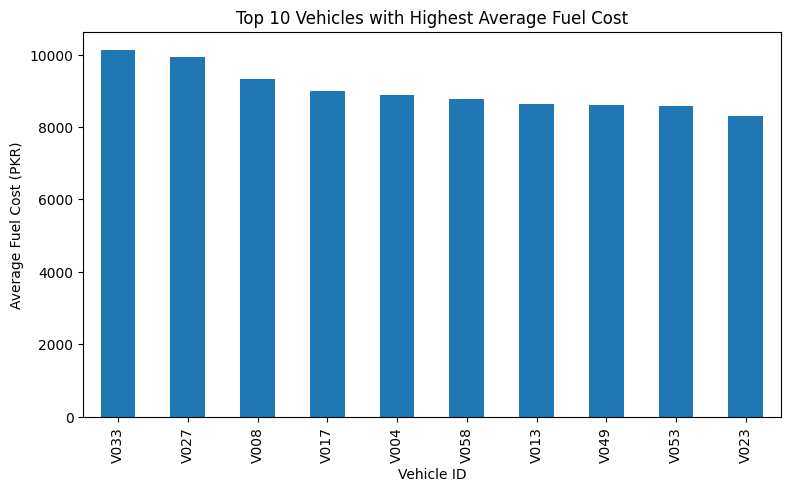

In [13]:
plt.figure(figsize=(9,5))
vehicle_cost.head(10).plot(kind='bar')
plt.title("Top 10 Vehicles with Highest Average Fuel Cost")
plt.xlabel("Vehicle ID")
plt.ylabel("Average Fuel Cost (PKR)")
plt.show()


**Monthly Fuel Cost Trend**

In [14]:
df['Month'] = df['Date'].dt.month
monthly_cost = df.groupby('Month')['Fuel_Cost_PKR'].sum()
monthly_cost

,Fuel_Cost_PKR
Month,
1,100385
2,74140
3,128762
4,216870
5,90783
6,148882
7,159281
8,160838
9,127777


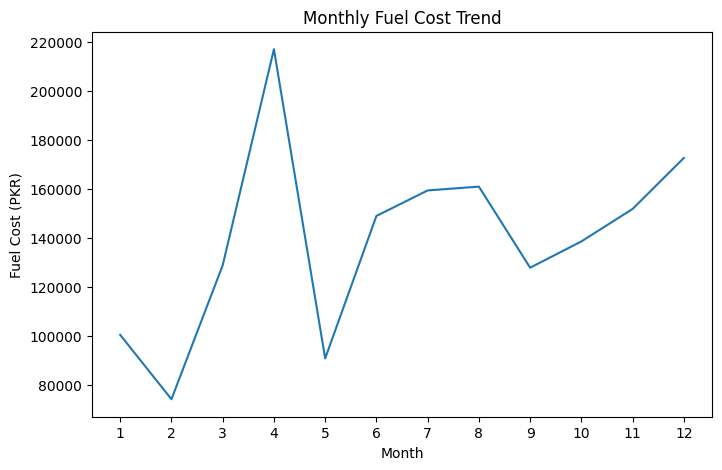

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_cost.index, y=monthly_cost.values)
plt.title("Monthly Fuel Cost Trend")
plt.xlabel("Month")
plt.ylabel("Fuel Cost (PKR)")
plt.xticks(range(1,13))
plt.show()


**Fuel Efficiency by City**

In [16]:
city_efficiency = df.groupby('City')['Fuel_Efficiency_km_per_liter'].mean().sort_values(ascending=False)
city_efficiency

,Fuel_Efficiency_km_per_liter
City,
Rawalpindi,5.392629
Karachi,5.076662
Peshawar,5.072957
Multan,5.038306
Quetta,5.023246
Lahore,5.002019
Faisalabad,4.861676
Islamabad,4.815456


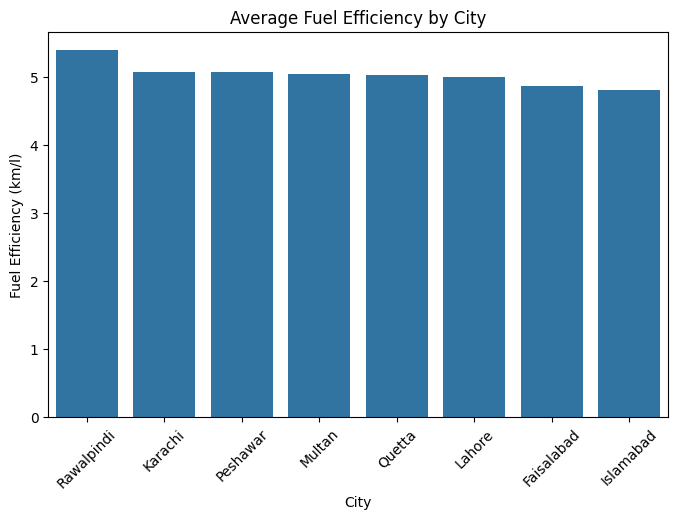

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=city_efficiency.index, y=city_efficiency.values)
plt.title("Average Fuel Efficiency by City")
plt.xlabel("City")
plt.ylabel("Fuel Efficiency (km/l)")
plt.xticks(rotation=45)
plt.show()


**Key Insights:**
1. Buses consume more fuel compared to vans but transport more passengers per trip.
2. Certain cities show significantly higher fuel costs due to longer routes and traffic congestion.
3. Fuel efficiency varies across vehicles, indicating differences in maintenance and driving behavior.
4. Some vehicles consistently incur higher fuel costs and may require inspection.
5. Fuel costs show monthly variations, likely due to route demand and fuel price changes.


**Recommendations:**
1. Schedule regular maintenance for low-efficiency vehicles.
2. Provide fuel-efficient driving training for drivers.
3. Optimize routes in high fuel-cost cities.
4. Replace or upgrade old vehicles with poor fuel efficiency.
5. Monitor fuel usage regularly to control operational costs.
